<h1>Multifile LDA demo</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

from multifile_lda import MultifileLDA
from multifile_viz import MultifileLDAViz
sns.set_style("whitegrid", {'axes.grid' : False})

/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<h2>1a. Extract features and run LDA</h2>

Create a new multifile LDA object and load the input files for beer1, 2, 3 and QC.

In [2]:
input_set = [
    ('input/Beer1pos_MS1filter_Method3_ms1.csv', 'input/Beer1pos_MS1filter_Method3_ms2.csv'),
    ('input/Beer2pos_MS1filter_Method3_ms1.csv', 'input/Beer2pos_MS1filter_Method3_ms2.csv'),
    ('input/Beer3pos_MS1filter_Method3_ms1.csv', 'input/Beer3pos_MS1filter_Method3_ms2.csv'),
    ('input/BeerQCpos_MS1filter_Method3_ms1.csv','input/BeerQCpos_MS1filter_Method3_ms2.csv'),
]

Extract word features from MS1 and MS2 tables. Previously this was done in R, now it's in Python.

Then normalise the data the same way as in the single-file version: within each fragmentation spectrum, we divide the MS2 intensities by the max MS2 intensity in the same spectrum and multiplying by *scaling_factor*.

In [3]:
lda = MultifileLDA()

scaling_factor=10           # previously set to 100 in the single file LDA 
fragment_grouping_tol=7     # grouping tolerance in ppm for the fragment
loss_grouping_tol=12        # grouping tolerance in ppm for the neutral loss
loss_threshold_min_count=15 # min. counts of loss values to occur
loss_threshold_max_val=200  # max. loss values

lda.load_all(input_set, scaling_factor, fragment_grouping_tol, loss_grouping_tol,
            loss_threshold_min_count, loss_threshold_max_val)

Loading input/Beer1pos_MS1filter_Method3_ms1.csv
Loading input/Beer1pos_MS1filter_Method3_ms2.csv
Loading input/Beer2pos_MS1filter_Method3_ms1.csv
Loading input/Beer2pos_MS1filter_Method3_ms2.csv
Loading input/Beer3pos_MS1filter_Method3_ms1.csv
Loading input/Beer3pos_MS1filter_Method3_ms2.csv
Loading input/BeerQCpos_MS1filter_Method3_ms1.csv
Loading input/BeerQCpos_MS1filter_Method3_ms2.csv
Processing fragments for file 0
Processing fragments for file 1
Processing fragments for file 2
Processing fragments for file 3
Total groups=6249
Processing losses for file 0
Processing losses for file 1
Processing losses for file 2
Processing losses for file 3
Total groups=31
Populating dataframe for fragment group 0/6249
Populating dataframe for fragment group 100/6249
Populating dataframe for fragment group 200/6249
Populating dataframe for fragment group 300/6249
Populating dataframe for fragment group 400/6249
Populating dataframe for fragment group 500/6249
Populating dataframe for fragment gr

In [4]:
K = 300
n_samples = 1000
n_burn = 0
n_thin = 1
alpha = 50.0/K
beta = 0.1
lda.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 .................................................................................................................................
 - file 1 .............................................................................................................................................................
 - file 2 ...............................................................................................................................................
 - file 3 .........................................................................................................................................

Using Numpy for multi-file LDA sampling
Sample      1 ..........  Log likelihood = -2245874.165 
Sample      2 ..........  Log likelihood = -2070541.422 
Sample      3 ..........  Log likelihood = -1879469.429 
Sample      4 ..........  Log likelihood = -1682108.044 
Sample      5 ..........  Log likelihood = -1514502.678 
Sample      6 ..........  Log likelihood = -139907

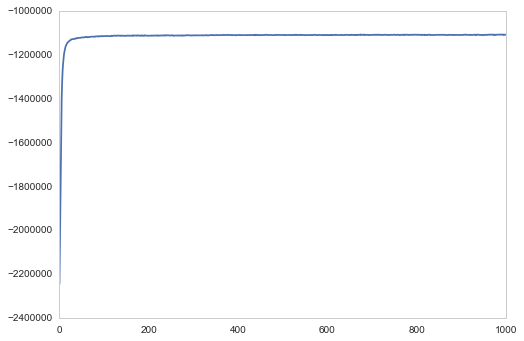

In [5]:
plt.plot(lda.log_likelihoods)

In [7]:
lda.save_project('results/beer_analysis.project', 'Initial analysis of all 4 beer runs by Joe')

Project saved to results/beer_analysis.project time taken = 11.3364708424


<h1>1b. Load existing LDA</h1>

In [ ]:
lda = MultifileLDA.resume_from('results/beer_analysis.project')

In [ ]:
lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.01)

In [ ]:
_ = lda.get_top_words()

<h1>2. Some Results</h1>

Create a plotting object

In [ ]:
plotter = MultifileLDAViz(lda)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

<h2>a. Ferulic Acid</h2>

From the excel doc, fragments indicative of ferulic acid substructure are:
- fragment_177.0547
- fragment_145.0284
- fragment_89.0386
- fragment_117.0331
- fragment_149.0599

From multifile LDA, we found topic 154 that seems to correspond to that pattern. 

In [ ]:
k = 58

In [ ]:
plotter.plot_docs(k)

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
plotter.plot_motif_degrees([k])

<h2>4. Histidine</h2>

From excel, the Histidine fragments are:
- fragment_110.0718
- fragment_156.0769
- fragment_93.0450
- fragment_95.0608

From multifile LDA, we found topic 274 is probably that.

In [ ]:
k = 237

In [ ]:
plotter.plot_docs(k)

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
plotter.plot_motif_degrees([k])

<h2>5. Phenylalanine</h2>

From excel, phenylalanine substucture are:
- fragment_120.0808
- fragment_103.0546
- fragment_91.0541

In [ ]:
k = 47
plotter.plot_docs(k)

In [ ]:
k = 181
plotter.plot_docs(k)

In [ ]:
_ = plotter.plot_e_alphas([47, 181])

In [ ]:
plotter.plot_motif_degrees([47, 181])

<h2>6. Leucine</h2>

- fragment_86.0965
- fragment_132.1016

In [ ]:
k = 91
plotter.plot_docs(k)

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
plotter.plot_motif_degrees([k])

<h2>7. Adenine</h2>

- fragment_136.0629
- fragment_119.0351

In [ ]:
k = 20
plotter.plot_docs(k)

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
plotter.plot_motif_degrees([k])

<h2>8. Cytosine</h2>

Prevalent in beer 2

* fragment_126.0665
* fragment_109.03976
* fragment_108.0560

In [ ]:
k = 212
plotter.plot_docs(k)

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
plotter.plot_motif_degrees([k])